In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
data = pd.read_csv("data.csv").drop(["Unnamed: 0", "year"], axis=1)
data

,"mid salary, hryvnias",population (thousands),fertility rate,mortality rate,GDP
0,125.23,51297.1,1.36,15.2,-10.0
1,143.09,50818.4,1.27,14.9,-3.0
2,152.83,50370.8,1.21,14.4,-1.9
3,177.39,49918.1,1.13,14.9,-0.2
4,231.04,49429.8,1.12,15.4,5.9
5,311.62,48923.2,1.08,15.3,8.8
6,375.98,48457.1,1.10,15.7,5.3
7,462.58,48003.5,1.17,16.0,9.5
8,590.53,47622.4,1.22,16.0,11.8
9,806.14,47280.8,1.21,16.6,3.1


EDA

Correlation matrix

<AxesSubplot:>

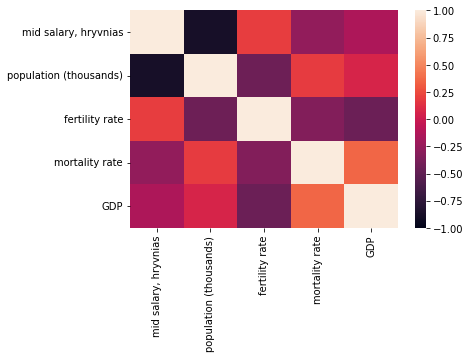

In [3]:
sns.heatmap(data.corr(), vmin=-1, vmax=1)

In [4]:
data.corr()

,"mid salary, hryvnias",population (thousands),fertility rate,mortality rate,GDP
"mid salary, hryvnias",1.000000,-0.878705,0.193474,-0.271146,-0.142770
population (thousands),-0.878705,1.000000,-0.443265,0.184113,0.064762
fertility rate,0.193474,-0.443265,1.000000,-0.335953,-0.451300
mortality rate,-0.271146,0.184113,-0.335953,1.000000,0.355561
GDP,-0.142770,0.064762,-0.451300,0.355561,1.000000


How parameters affect on population.

In [5]:
data_find_rel = data.drop("population (thousands)", axis=1)
for col in data_find_rel.columns:
    print(f"{col} and Population p-value: {stats.ttest_rel(data['population (thousands)'], data_find_rel[col])[1]}")

mid salary, hryvnias and Population p-value: 1.7048897408701987e-22
fertility rate and Population p-value: 7.099811727109381e-31
mortality rate and Population p-value: 7.139507982730481e-31
GDP and Population p-value: 7.070936493118624e-31


**Conclusion**
As we see, all parameters have effect on population, but good prediction model may be non-linear.

Let purpose, we want to build the model, which predict values of all parameters using previous values of it. Let analyse it.

Let see the behaviour of every parameter depends it's previous values. May be, we will be able to select correct prediction model using mutual recursion.

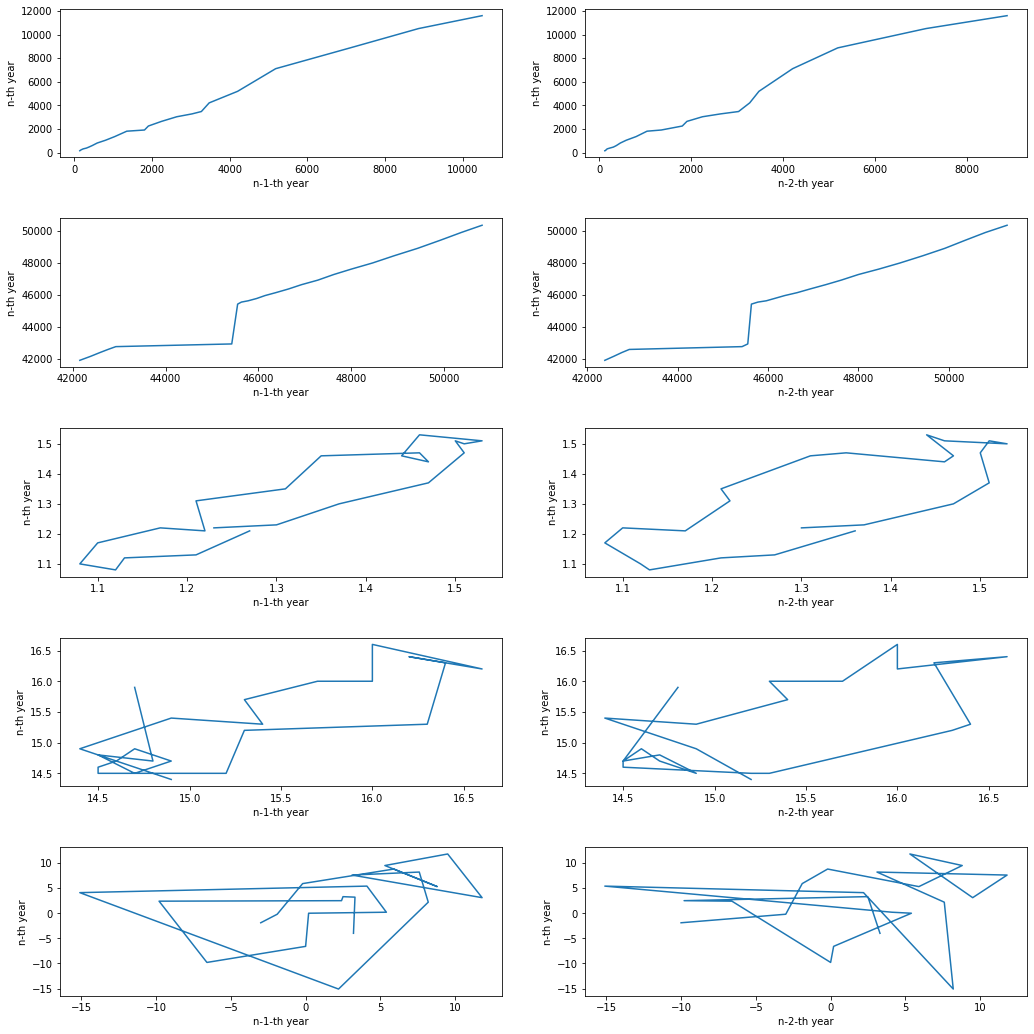

In [15]:
# step k=2

data_pairs = []
for column in data.columns:
    data_pairs.append( [data[column].to_list()[:-2], data[column].to_list()[1:-1],data[column].to_list()[2:]] )

fig, axs = plt.subplots(5, 2)
i = 0
for dp_variant in data_pairs:
    axs[i, 0].plot(dp_variant[1], dp_variant[2])
    axs[i, 0].set_xlabel("n-1-th year")
    axs[i, 0].set_ylabel("n-th year")
    
    axs[i, 1].plot(dp_variant[0], dp_variant[2])
    axs[i, 1].set_xlabel("n-2-th year")
    axs[i, 1].set_ylabel("n-th year")
    i += 1

fig.set_size_inches(15, 15)
fig.tight_layout(pad=3.0)
plt.show()

As we see, values of mortality rate, fertility rate and GDP we won't be able to predict using it's previous values. So, I have next question:
** may these parameters be depended byprevious values of middle salary and population?

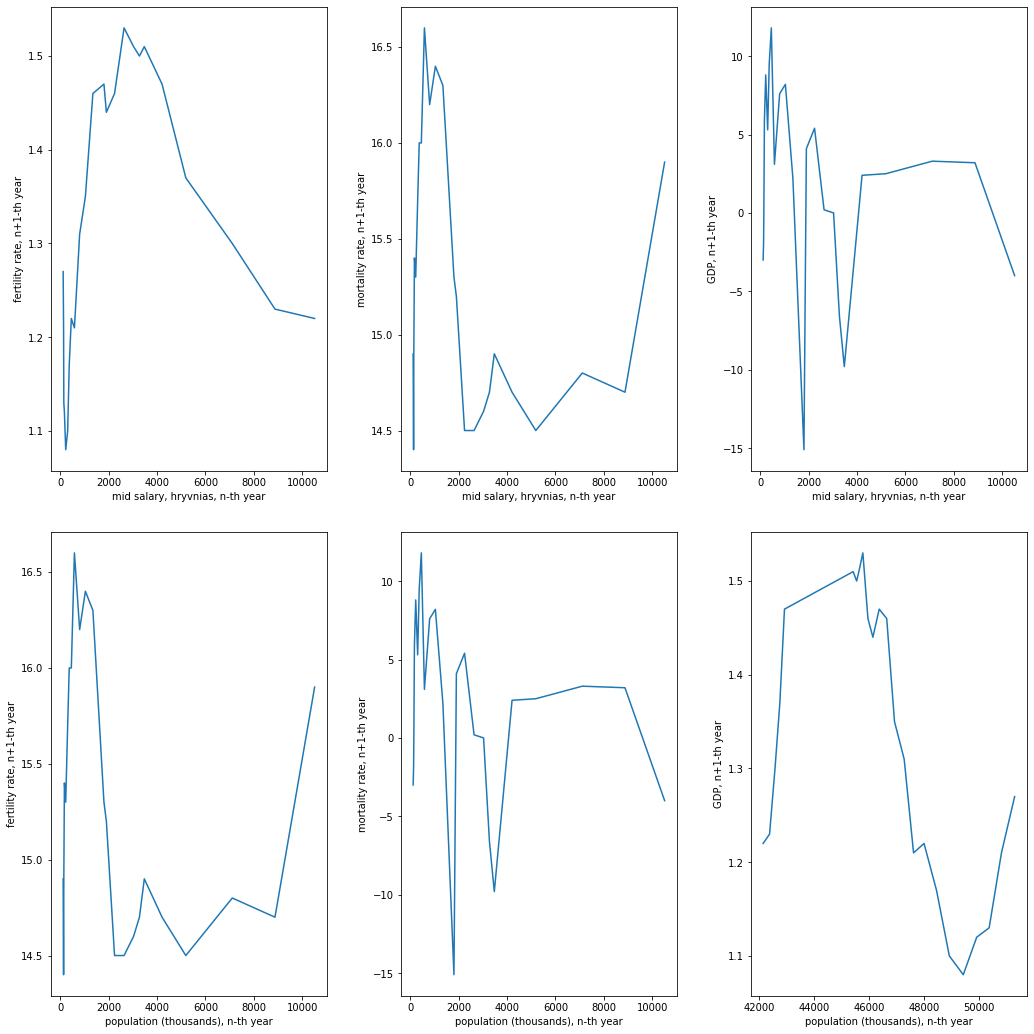

In [23]:
data_pairs = []
for x in data.columns[:2]:
    for y in data.columns[2:]:
        data_pairs.append( [data[x].to_list()[:-1], data[y].to_list()[1:]] )

fig, axs = plt.subplots(2, 3)
i = 0
j = 0
for i in range(2):
    for j in range(3):
        axs[i, j].plot(data_pairs[i+j][0], data_pairs[i+j][1])
        axs[i, j].set_xlabel(f"{data.columns[i]}, n-th year")
        axs[i, j].set_ylabel(f"{data.columns[2+j]}, n+1-th year")

fig.set_size_inches(15, 15)
fig.tight_layout(pad=3.0)
plt.show()

On graphs we can see the existance of dependencies, but they are so difficult to study. So, is any sence to use prediction model based on mutual recurcion? I think, no.
**So, what may be the solution for this task?**